# Task 1

Task 1: Build a **Multiple Linear Regression model** that predicts the number of deaths in various countries due to COVID-19. You are free to select and choose the dataset you would like to use while building the model and are allowed to use the Pandas Library in your code and can use Excel.

The following technical/tool constraint applies: you are NOT allowed to use any existing machine learning packages, such as scikit-learn.

As a general guide, you may need to undertake the following actions:
- Find data sets for the **number of deaths** in various countries **(a minimum of 20 countries)** due to COVID-19.
- Research for appropriate predictor variables to predict deaths due to COVID-19.
- You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
- Find data sets on the chosen predictors for the various countries in the model.
- Use **plots** to visualize and understand your data.
- Build a **model** and **test the accuracy of your model**, using an appropriately chosen metric(hint: r2 is not a good metric for this task).
- If needed, improve your model by incorporating other predictors, and/or removing existing ones.
- Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.

In [3]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data 
We use data from [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) 

In [4]:
# importing the dataset by reading the csv file
pd.reset_option('display.max_rows')
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


#### Inital set of features according to research and data availability

Target: `total_deaths`: Total confirmed cases of COVID-19

Factors affecting death rates: (according to research)

*Factors we have data for and will explore are in **bold***

Healthcare Systems (healthcare capacity)
- `icu_patients`: Number of COVID-19 patients in intensive care units (ICUs) on a given day
- `icu_patients_per_million`: Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
- `hosp_patients`: Number of COVID-19 patients in hospital on a given day
- `hosp_patients_per_million`: Number of COVID-19 patients in hospital on a given day per 1,000,000 people
- `hospital_beds_per_thousand`: Hospital beds per 1,000 people, most recent year available since 2010
- ~~`handwashing_facilities`~~: Share of the population with basic handwashing facilities on premises, most recent year available **(not used because too little data)**

Nature of disease
- `reproduction_rate`: infection producing contacts per unit time x mean infectious period (Real-time estimate of the effective reproduction rate (R) of COVID-19.)

National Policies
- `stringency_index`: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
- `total_tests`: Total tests for COVID-19
- `total_vaccinations`: Total number of COVID-19 vaccination doses administered

Demographics/health
- `population_density`: Number of people divided by land area, measured in square kilometers, most recent year available
- `aged_65_older`: Share of the population that is 65 years and older, most recent year available
- ~~`cardiovasc_death_rate`~~: Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) **(not used because the data is too old)**
- ~~`diabetes_prevalence`~~: Diabetes prevalence (% of population aged 20 to 79) in 2017 **(not used because the data is too old)**

Economy
- `gdp_per_capita`: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
- `extreme_poverty`: Share of the population living in extreme poverty, most recent year available since 2010

Others
- `continent`: Continent of the geographical location
- `location`: Geographical location
- `date`: Date of observation


## Cleaning and filtering data

In [5]:
pd.set_option('display.max_rows', None)
print(pd.options.display.max_rows)
pd.reset_option('display.max_rows')

df.isna().sum()

df.duplicated().sum()

None


0

In [6]:
# Filtering data
columns=['date','location','continent','population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_covid = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns]

In [7]:
# filling NaN values
print(df_covid.isna().sum())
df_covid=df_covid.fillna(0)

date                             0
location                         0
continent                        0
population_density               0
gdp_per_capita                   0
total_deaths                     0
extreme_poverty               1914
stringency_index               150
total_tests                   1947
total_vaccinations            1253
reproduction_rate              162
handwashing_facilities        8613
hospital_beds_per_thousand       0
hosp_patients_per_million     1411
hosp_patients                 1411
icu_patients_per_million      2590
icu_patients                  2590
dtype: int64


## Visualising data
Visualise data to see trends and patterns

Text(0.5, 1.0, 'Total deaths vs date')

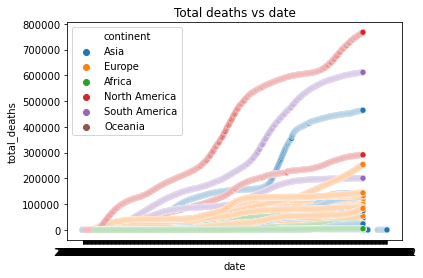

In [8]:
myplot = sns.scatterplot(x='date', y='total_deaths', hue='continent', data=df)
myplot.set_title('Total deaths vs date', fontsize=12)

In [9]:
# Splitting data into numerical and categorical to that we can normalise the numerical data 
columns_cat=['date','location','continent']
columns_num=['population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_cat = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_cat]

df_num = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_num]

# Normalise numerical data for cleaner visualisation
def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

data_norm = normalize_z(df_num)
stats = data_norm.describe()
# display(stats)

# Concatenate normalised numerical data and categorical data
frames=[df_cat, data_norm]
result = pd.concat(frames,axis=1)
result = result.fillna(0)


### Each feature against total deaths

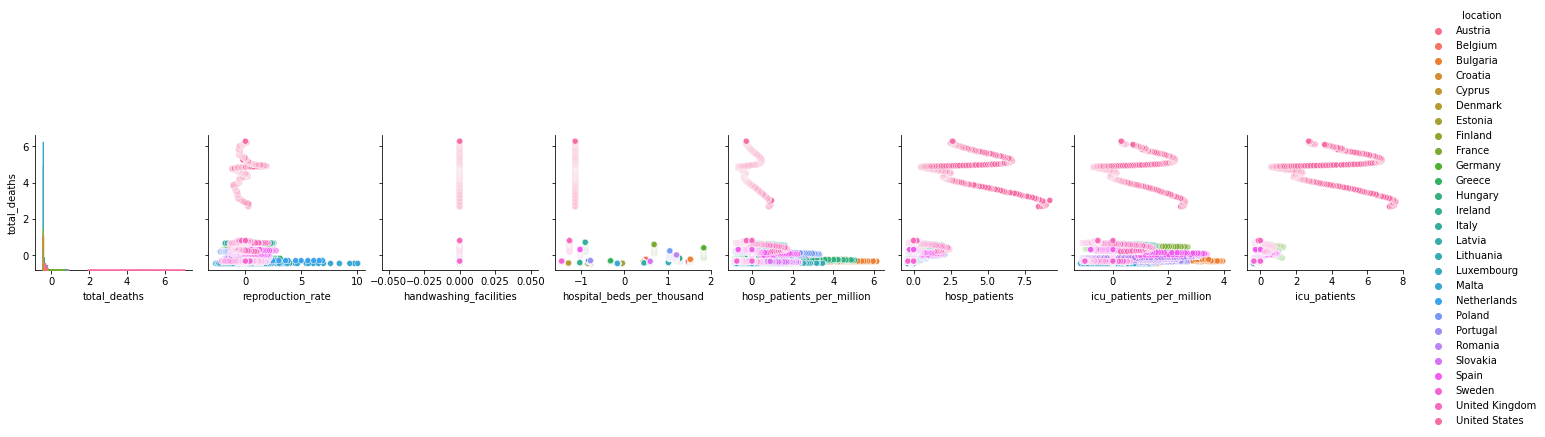

In [10]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients'],y_vars=['total_deaths'])

Observe that there exists high;y non-linear relationship between ```total_deaths``` and ```hosp_patients_per_million```, ```hosp_patients```,```icu_patients_per_million```,```icu_patients```. This will be important for determining which features to add polynormial terms to.

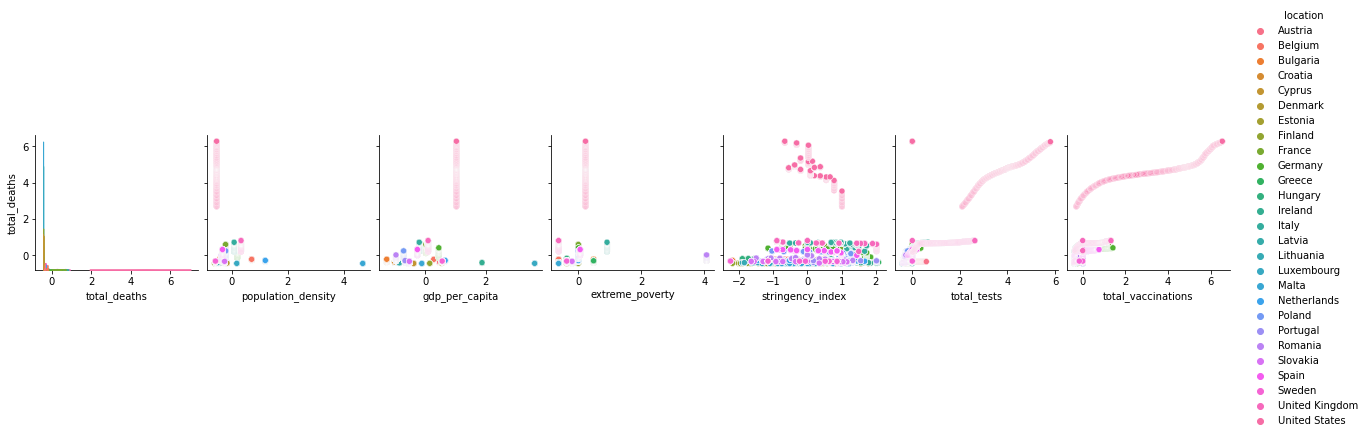

In [11]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','population_density','gdp_per_capita',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations'],y_vars=['total_deaths'])

## 1. Train naive model (normal multi linear regression with 11 variables)

In [12]:
# Prepare all functions

def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature=df.loc[:,feature_names]
    df_target=df.loc[:,target_names]
    return df_feature, df_target

def compute_cost(X, y, beta):
    J = 0
    #calculate m, no of rows/data pt
    m = X.shape[0]
    
    #calculate yp, predicted target value from X and beta
    yp = np.matmul(X, beta)
    
    #calculate the error
    error = yp-y
    
    #calculate the cost
    J = (1/(2*m))*np.matmul(error.T, error)
    J= J[0][0] #to get the float
    return J

def prepare_feature(df_feature):
    #numpy is just arrays
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0],1))
    X = np.concatenate((array1, feature), axis = 1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy() 

def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from shape of X or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)

    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        
        #--> compute the error
        error = yp - y
        
        #--> compute the new beta
        beta = beta - (alpha/m)*np.matmul(X.T, error)
        
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    X = prepare_feature(df_feature)
    yp = predict_norm(X, beta)
    return yp

def mean_squared_error(target, pred):
    n=target.shape[0]
    error=target-pred
    mse=(1/n)*np.sum(error**2)
    return mse

def r2_score(y, ypred):
    # calculate ssres
    diff = y - ypred
    ssres = np.matmul(diff.T, diff)[0][0]
    
    # calculate sstot
    ymean=np.mean(y)
    diff_mean=y-ymean #element wise subtraction
    sstot= np.matmul(diff_mean.T, diff_mean)[0][0]
    
    # calcuate r2
    return 1-(ssres/sstot)

def adj_r2_score(X,y,ypred):
    r2=r2_score(y, ypred)
    adj_r2=1 - ((1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
    return adj_r2

## Obtain coefficents via **gradient descent** and **normal equation**

In [13]:
# Get features and targets from data frame
feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])

# Normalize features
df_feature_z=normalize_z(df_feature)

# Export same set of data to excel for excel analysis 
# frames=[df_feature_z , df_target]
# excel = pd.concat(frames,axis=1)
# excel = excel.fillna(0)
# # display(excel)
# excel.to_excel("covid_data_excel.xlsx")

# Prepare X and target vector
X = prepare_feature(df_feature_z)
m=X.shape[1]
target = prepare_target(df_target)

# Set up gradient descent
iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
# with np.printoptions(threshold=np.inf):
#     print(beta)

# Normal equation
X_sq=np.linalg.inv(np.matmul(X.T,X))
Xy=np.matmul(X.T,target)
beta_n= np.matmul(X_sq,Xy)


Text(0, 0.5, 'Cost')

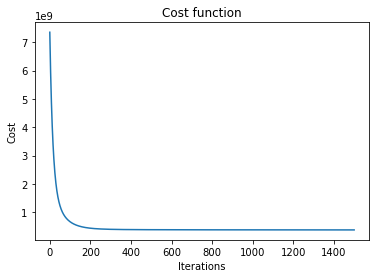

In [14]:
plt.plot(J_storage)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [15]:
# Call the predict method to get the y predicted using coeffs from GS and norm eqn 

pred = predict(df_feature, beta) # predicted value using beta obtained from ggs
pred_n = predict(df_feature, beta_n) # predicted value using beta obtained from norm eqn

# print(pred)
# print(pred_n)


## Evaluate model

In [16]:
# Generate line fit plots
# for i in range(len(feature)):
#     ft=feature[i]
#     plt.figure(i)
#     plt.scatter(df_feature[ft],target)
#     plt.scatter(df_feature[ft],pred)
#     plt.xlabel(ft)
#     plt.ylabel('total number of deaths')
#     plt.legend(['actual','predicted'])

### Visualise residual plot 

Text(0, 0.5, 'Residual')

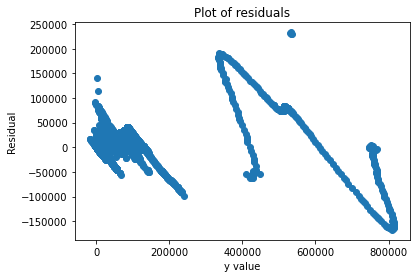

In [17]:
# Calculate and plot residuals
error=target-pred
plt.scatter(pred,error)
plt.title('Plot of residuals')
plt.xlabel('y value')
plt.ylabel('Residual')

Analysis for residual plots: Ideally residual plot should show no discernable pattern if the model is a good fit to data. But there is a pattern and this suggests that linear may not be the best fit. There are some portions of y predicted where the residual is highly positive and others where the residual is highly negative. This indicates a highly non-linear relationship between predictor variables and target. We need to further investigate if what the plot suggests is true.

### Quantitative measurements of accuracy

Reasons for metrics:

> 1. Mean Squared Error

The mean squared error (MSE) tells you how close a regression line is to a set of points. This in turn tells use how well is our model fit to the data.

> 2. R2

R2 measures the proportion of variability in Y that can be explained using X.


> 3. Adjusted R2

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. This allows us to compare the accuracy of various models without worrying that the increase in accuracy is due to the addition of meaningless variables.

In [18]:

mse=mean_squared_error(target,pred)
print('MSE: ',mse)

# rse=np.sqrt(mse/(X.shape[0]-m-1))
# print('RSE: ',rse)

r2=r2_score(target, pred)
print('r2: ',r2)

adj_r2=adj_r2_score(X,target,pred)
print('adjusted r2: ',adj_r2)


MSE:  750735505.3630497
r2:  0.9422088094554505
adjusted r2:  0.9421281705849233


## Further analysis into model
## 1. Excel experimentation

## 1. Excel analysis

From the excel done for modelling uncertainty, we found answers for the following questions:
> ### 1. Is there a relationship between the response and predictors?

We set up a hypothesis test to answer this question.

*Null hypothesis*: $H0: β1 =β2 =···=βp =0$

*Alternative hypothesis*: $Ha$: at least one $βj$ is non-zero.

This hypothesis test is performed by computing the $F-statistic$. If $Ha$ is true, then $E{(TSS − RSS)/p} > σ2$, so we expect $F$ to be greater than 1.

$F = 14125.72909$, Significance F (p-value associated with F statistic) = $0 < 0.01$
The p-value associated with the F-statistic zero, so we have extremely strong evidence that at least one of the factors is associated with increased death rates from covid.

For each individual predictor, we also obtained a t-statistic and the corresponding p-value. These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. It turns out that each of these are exactly equivalent to the F-test that omits that single variable from the model, leaving all the others in. So it reports the partial effect of adding that variable to the model.

All the p-values of the t statitic is $p<0.01$. Since the number of predictors is relatively small, this also corroborates the conclusion made using the $F-statistic$ that i the ith variable is related to total deaths of covid in the presence of the other n-1 predictors.

Source: [Springer Texts in Statistics, Vol. 103] Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani - An Introduction to Statistical Learning with Applications in R (2013, Springer) - libgen.lc.pdf

> ### 2. Which variables are more important?

Since we currently have 11 predictor variables, the model may be very complex and be prone to overfitting. Want to decrease model's complexity by selecting only the most important variables. However, all p-values fo the t-statitcs are very small and does not give us much insight.

## 2. Feature selection simulation
### Can we use another method to determine which varaibles are more important?
Yes, we created a simulation to find a combination of features that minimises the mse and maximises r2.

In [19]:
import itertools

def evalue_models_with_diff_feature_combinations(features):
    #1 get all different combinations of features
    store_evaluations = []
    for L in range(0, len(features)+1):
        #2 for each combination, run model, print combination, r2 and adj_r2
        for features_subset in itertools.combinations(features, L):
            features_list = [*features_subset]
            if features_list == []:
                continue
            #run base model
            df_feature, df_target = get_features_targets(df_covid, features_subset, ['total_deaths'])
            
            # Normalize features
            df_feature_z=normalize_z(df_feature)

            # Prepare X and target vector
            X = prepare_feature(df_feature_z)
            m=X.shape[1]
            target = prepare_target(df_target)

            # Set up gradient descent
            iterations = 1500
            alpha = 0.01
            beta = np.zeros((m,1))

            # Call the gradient_descent function
            beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
            # with np.printoptions(threshold=np.inf):
            #     print(beta)

            # Call the predict method to get the y predicted using coeffs from GS and norm eqn 
            pred = predict(df_feature, beta)

            mse_eval=mean_squared_error(target,pred)
            
            r2_eval = r2_score(target,pred)
            
            #adj_r2_eval
            adj_r2_eval=adj_r2_score(X,target,pred)
            
            
            #print('―' * 10)
            #print(f"feature combination: {features_subset}")
            #print(f"mse {mse_eval}")
            #print("r2",r2_eval)
            #print("adj_r2",adj_r2_eval)
            #print('―' * 10)

            store_evaluations.append([features_subset,mse_eval,r2_eval,adj_r2_eval])
    #print max 
    #print('―' * 10)
    #print('―' * 10)
    #print('―' * 10)
    
    best_fit = max(store_evaluations, key=lambda x: x[3])
    print(f"best_fit combination:", best_fit[0])
    print(f"best_fit mse:", best_fit[1])
    print(f"best_fit r2:", best_fit[2])
    print(f"best_fit adj_r2:", best_fit[3])
    return None    

In [20]:

# evalue_models_with_diff_feature_combinations(feature)


### Result of the simulation:
<img src="./images/best_subset_task1.png">

Our simulation determines the subset contain all variables except ```icu_patients```  result in the best model (smallest MSE and largest adjusted r2).

## Insights
Next step is to 
1. Remove variable that is less important for our analysis (based on simulation results)
- icu_patients

2. Add polynomial terms to model (based on pairplot analysis)
- hosp_patients_per_million
- hosp_patients
- icu_patients_per_million
- icu_patients

# 2. Updated polynomial regression that removes redundant terms

In [46]:
# Function to raise selected features to higher power
def transform_features(df_feature, colname, colname_transformed,power):
    df_out=df_feature.copy()
    if power==1:
        return df_out
    for i in range(2,power+1):
        df_out.loc[:,colname_transformed+str(i)]=df_feature[colname]**i 
    return df_out

In [47]:
# Run polynomial regression

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million']
power_feature=['hosp_patients_per_million','hosp_patients','icu_patients_per_million']


all={}
for i in range(1,5):
    print(f"Power: {i}")
    df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
    for f in power_feature:
        df_feature = transform_features(df_feature, f, f+"^",i)

    # normalize the feature using z normalization
    df_feature_z = normalize_z(df_feature)

    # print(df_feature.describe())
    X = prepare_feature(df_feature_z)
    # print(X)
    m=X.shape[1]
    target = prepare_target(df_target)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((m,1))

    # call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    # print('---',beta)

    # call the predict method to get the predicted values
    pred = predict(df_feature, beta)
    
    # print(pred)
    all[i]=pred

print(all)


Power: 1
Power: 2
Power: 3
Power: 4
{1: array([[ 20224.91898195],
       [ 21274.53071583],
       [ 21035.79234472],
       ...,
       [527659.03841964],
       [530272.26110455],
       [528463.44726732]]), 2: array([[ 19793.33383203],
       [ 20949.71416037],
       [ 20711.68789476],
       ...,
       [530540.07666387],
       [533040.00885145],
       [531311.37079721]]), 3: array([[ 19485.09262238],
       [ 20618.20194727],
       [ 20304.58030728],
       ...,
       [533261.83366044],
       [536197.05295608],
       [534158.6785557 ]]), 4: array([[ 19908.550635  ],
       [ 21034.52998615],
       [ 20713.0540927 ],
       ...,
       [532089.34995123],
       [535152.67677745],
       [533023.90352214]])}


Text(0, 0.5, 'Cost')

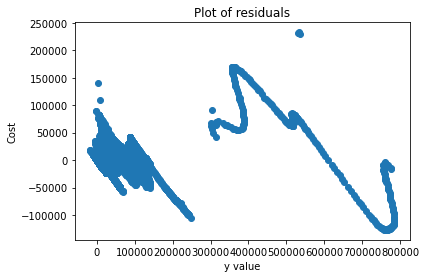

In [48]:
# Calculate and plot residuals
error=target-pred
plt.scatter(pred,error)
plt.title('Plot of residuals')
plt.xlabel('y value')
plt.ylabel('Cost')

Analysis for residual plots: Increasing the power of selected features does not randomise the plot further either. Improvement of model fit to data by raising selected features to higher power cannot be seen in the residual plots.

Power: 1
mse 747332091.9212179
r2 0.9424708022789066
adj_r2 0.94233688887639
Power: 2
mse 675428006.8033074
r2 0.9480059376951689
adj_r2 0.9478849086860794
Power: 3
mse 670387668.2635443
r2 0.9483939400780049
adj_r2 0.9482738142401976
Power: 4
mse 679168259.1898797
r2 0.9477180152020765
adj_r2 0.9475963159823421


Text(0.5, 1.0, 'Plot of adjusted r2 when raising selected features to various powers')

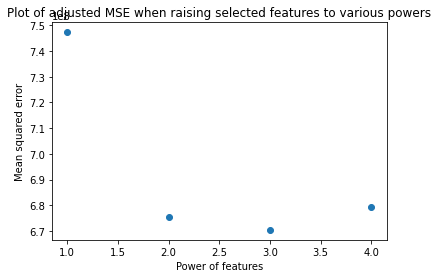

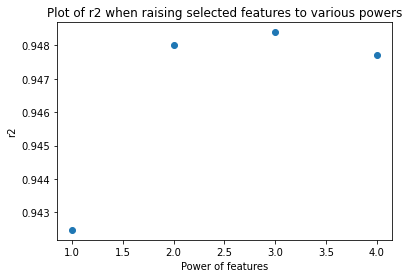

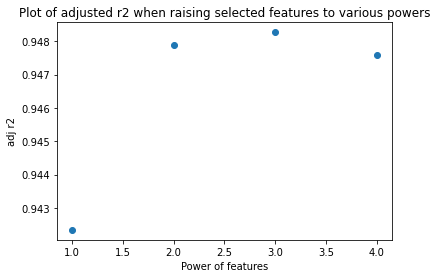

In [49]:
# Calculate the metrics of accuracy
mse_all=[]
r2_all=[]
adj_r2_all=[]
power=list(range(1,5))
for i in range(1,5):
    print(f"Power: {i}")
    pred=all[i]
    mse2=mean_squared_error(target,pred)
    print("mse",mse2)
    mse_all.append(mse2)

    # why in HW9 can use r2 for mult linreg and polynomial reg
    r2_2=r2_score(target, pred)
    print("r2",r2_2)
    r2_all.append(r2_2)
    
    adj_r2_2=adj_r2_score(X,target,pred)
    print("adj_r2",adj_r2_2)
    adj_r2_all.append(adj_r2_2)

plt.figure(6)
plt.scatter(power,mse_all)
plt.xlabel('Power of features')
plt.ylabel('Mean squared error')
plt.title('Plot of adjusted MSE when raising selected features to various powers')
plt.figure(7)
plt.scatter(power,r2_all)
plt.xlabel('Power of features')
plt.ylabel('r2')
plt.title('Plot of r2 when raising selected features to various powers')
plt.figure(8)
plt.scatter(power,adj_r2_all)
plt.xlabel('Power of features')
plt.ylabel('adj r2')
plt.title('Plot of adjusted r2 when raising selected features to various powers')

## Further analysis
### Can we improve our model further?
## 1. Checking for collinearity

Collinearity refers to the situation in which two or more predictor variables are closely related to one another.

Analysis for plots of the metrics: Raising the selected features to power 3 minimises the MSE and maximises the adjusted r2. 

Text(0.5, 1.0, '')

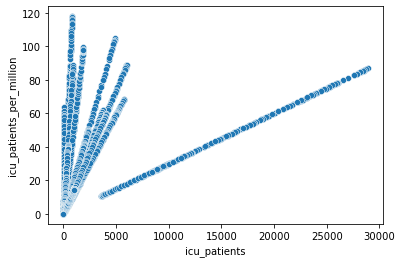

In [52]:
myplot = sns.scatterplot(x='icu_patients', y='icu_patients_per_million', data=df_covid)
myplot.set_title('', fontsize=12)

Text(0.5, 1.0, '')

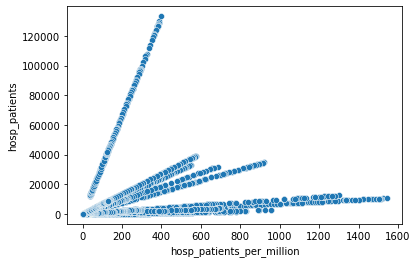

In [53]:
myplot = sns.scatterplot(x='hosp_patients_per_million', y='hosp_patients', data=df_covid)
myplot.set_title('', fontsize=12)

Analysis of the plots: ```hosp_patients_per_million```and ```hosp_patients``` (similarly for ```icu_patients_per_million``` and ```icu_patients```) are highly collinear. This could cause inaccurate estimates of the regression coefficients.

It can also cause inflated the standard errors of the regression coefficients, deflate the partial t-tests for the regression coefficients, give false, nonsignificant, pvalues, and degrade the predictability of the model. 

### Insights
Remove ```hosp_patients``` and ```icu_patients``` to decrease the negative effects of collinearity.

## 3. Polynomial regression model (remove collinear terms)

In [54]:
# Run polynomial regression

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million', 'icu_patients_per_million']

power_feature=['hosp_patients_per_million','icu_patients_per_million']


all={}
for i in range(1,5):
    print(f"Power: {i}")
    df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
    for f in power_feature:
        df_feature = transform_features(df_feature, f, f+"^",i)
    
    # normalize the feature using z normalization
    df_feature_z = normalize_z(df_feature)

    # print(df_feature.describe())
    X = prepare_feature(df_feature_z)
    # print(X)
    m=X.shape[1]
    target = prepare_target(df_target)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((m,1))

    # call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    # print('---',beta)

    # call the predict method to get the predicted values
    pred = predict(df_feature, beta)
    
    # print(pred)
    all[i]=pred

print(all)


Power: 1
Power: 2
Power: 3
Power: 4
{1: array([[ 29499.16621534],
       [ 30576.09800911],
       [ 30595.95982301],
       ...,
       [439482.96460972],
       [439745.33573754],
       [439446.35037213]]), 2: array([[ 30498.21367152],
       [ 31493.46820923],
       [ 31638.66961684],
       ...,
       [441142.66127739],
       [441460.33256681],
       [441122.58867432]]), 3: array([[ 30128.58702446],
       [ 31078.72140966],
       [ 31264.10316857],
       ...,
       [441996.42958237],
       [442323.14458436],
       [441970.92789447]]), 4: array([[ 29907.61028319],
       [ 30770.05080846],
       [ 30954.68784737],
       ...,
       [442139.3985816 ],
       [442469.59113779],
       [442101.81417926]])}


Power: 1
mse 1161292409.9659584
r2 0.9106043733607261
adj_r2 0.910437978522868
Power: 2
mse 1150761823.1661744
r2 0.9114150119197721
adj_r2 0.9112501259484734
Power: 3
mse 1148978778.9971633
r2 0.9115522696418121
adj_r2 0.9113876391525461
Power: 4
mse 1148248083.2780948
r2 0.9116085181810502
adj_r2 0.9114439923889255


Text(0.5, 1.0, 'Plot of adjusted r2 when raising selected features to various powers')

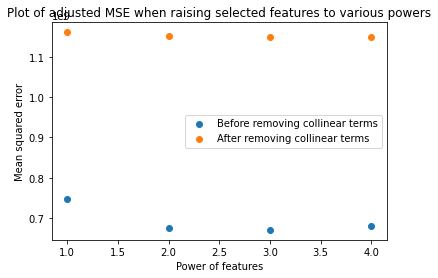

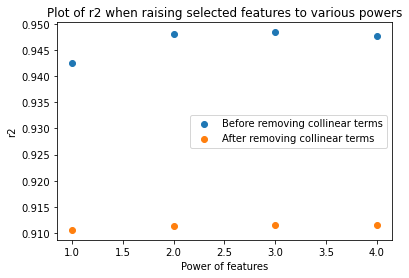

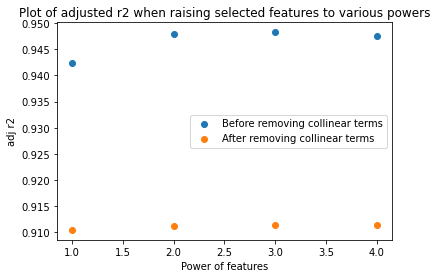

In [55]:
# Calculate the metrics of accuracy
mse_all2=[]
r2_all2=[]
adj_r2_all2=[]
power=list(range(1,5))
for i in range(1,5):
    print(f"Power: {i}")
    pred=all[i]
    mse2=mean_squared_error(target,pred)
    print("mse",mse2)
    mse_all2.append(mse2)

    # why in HW9 can use r2 for mult linreg and polynomial reg
    r2_2=r2_score(target, pred)
    print("r2",r2_2)
    r2_all2.append(r2_2)
    
    adj_r2_2=adj_r2_score(X,target,pred)
    print("adj_r2",adj_r2_2)
    adj_r2_all2.append(adj_r2_2)

plt.figure(6)
plt.scatter(power,mse_all)
plt.scatter(power,mse_all2)
plt.legend(['Before removing collinear terms','After removing collinear terms'])
plt.xlabel('Power of features')
plt.ylabel('Mean squared error')
plt.title('Plot of adjusted MSE when raising selected features to various powers')

plt.figure(7)
plt.scatter(power,r2_all)
plt.scatter(power,r2_all2)
plt.legend(['Before removing collinear terms','After removing collinear terms'])
plt.xlabel('Power of features')
plt.ylabel('r2')
plt.title('Plot of r2 when raising selected features to various powers')

plt.figure(8)
plt.scatter(power,adj_r2_all)
plt.scatter(power,adj_r2_all2)
plt.legend(['Before removing collinear terms','After removing collinear terms'])
plt.xlabel('Power of features')
plt.ylabel('adj r2')
plt.title('Plot of adjusted r2 when raising selected features to various powers')



Analysis: removal of collinear terms made the model less accurate. Expected because there are less terms which make the model fit not as well to the data.

## 4. Final model (degree 3 polynomial model without removal of collinear terms)

In [56]:
# Run polynomial regression

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million']
power_feature=['hosp_patients_per_million','hosp_patients','icu_patients_per_million']


all={}
df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
for f in power_feature:
    df_feature = transform_features(df_feature, f, f+"^",3)
display(df_feature)

# normalize the feature using z normalization
df_feature_z = normalize_z(df_feature)

# print(df_feature.describe())
X = prepare_feature(df_feature_z)
print(X[1,:])
m=X.shape[1]
target = prepare_target(df_target)

iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print("beta: ",beta)

# call the predict method to get the predicted values
pred = predict(df_feature, beta)
# print("predicted y: ",pred)
print(pred[1])

mse=mean_squared_error(target,pred)
print('MSE: ',mse)

r2=r2_score(target, pred)
print('r2: ',r2)

adj_r2=adj_r2_score(X,target,pred)
print('adjusted r2: ',adj_r2)




,population_density,gdp_per_capita,stringency_index,total_tests,total_vaccinations,reproduction_rate,hospital_beds_per_thousand,hosp_patients_per_million,hosp_patients,icu_patients_per_million,hosp_patients_per_million^2,hosp_patients_per_million^3,hosp_patients^2,hosp_patients^3,icu_patients_per_million^2,icu_patients_per_million^3
7859,106.749,45436.686,82.41,0.0,5175.0,0.94,7.37,205.461,1858.0,42.574,42214.222521,8.673376e+06,3.452164e+06,6.414121e+09,1812.545476,77167.311095
7860,106.749,45436.686,82.41,3780489.0,5185.0,0.96,7.37,206.125,1864.0,40.141,42487.515625,8.757739e+06,3.474496e+06,6.476461e+09,1611.299881,64679.188523
7861,106.749,45436.686,82.41,3793090.0,5318.0,0.99,7.37,215.966,1953.0,40.694,46641.313156,1.007294e+07,3.814209e+06,7.449150e+09,1656.001636,67389.330575
7862,106.749,45436.686,82.41,3808540.0,7127.0,1.02,7.37,224.813,2033.0,41.026,50540.884969,1.136225e+07,4.133089e+06,8.402570e+09,1683.132676,69052.201166
7863,106.749,45436.686,82.41,3831170.0,7990.0,1.02,7.37,223.597,2022.0,39.920,49995.618409,1.117887e+07,4.088484e+06,8.266915e+09,1593.606400,63616.767488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127132,35.608,54225.446,44.91,642687108.0,442106031.0,0.00,2.77,125.074,41639.0,33.819,15643.505476,1.956596e+06,1.733806e+09,7.219396e+13,1143.724761,38679.627692
127133,35.608,54225.446,44.91,0.0,443009805.0,0.00,2.77,124.374,41406.0,33.946,15468.891876,1.923928e+06,1.714457e+09,7.098880e+13,1152.330916,39117.025275
127134,35.608,54225.446,44.91,0.0,443281184.0,0.00,2.77,125.425,41756.0,33.870,15731.430625,1.973115e+06,1.743564e+09,7.280424e+13,1147.176900,38854.881603
127135,35.608,54225.446,44.91,0.0,443374199.0,0.00,2.77,128.654,42831.0,34.312,16551.851716,2.129462e+06,1.834495e+09,7.857324e+13,1177.313344,40395.975459


[ 1.         -0.27281467  0.46132043  1.59326304 -0.32136826 -0.35909268
 -0.17332378  1.47722883  0.22886374 -0.21515994  0.94009453 -0.14008293
 -0.17293584 -0.16630481 -0.11460945  0.42677065  0.0775493 ]
beta:  [[ 50357.17171379]
 [ -2336.25690542]
 [ -2173.53831279]
 [  2495.90837776]
 [ 35646.25020873]
 [ 52853.27470739]
 [ -1728.53875944]
 [  2419.7059956 ]
 [-10633.38913396]
 [ 42905.57244269]
 [  4889.5741786 ]
 [ -1037.0547739 ]
 [  4066.43250911]
 [  -488.18591709]
 [-11935.57046358]
 [  -948.57385445]
 [ -2674.09092253]]
[20618.20194727]
MSE:  670387668.2635443
r2:  0.9483939400780049
adjusted r2:  0.948291868755297


Adding polynomial terms improved model fit to data marginally. We thought log terms may be more appropriate for the shape of the graph. However, there was quite a few negative values in the graph that kept throwing errors making the development of a more complex non-linear model difficult. Hence, we stuck to the polynomial model and left the the code for the log model to the appendix for the curious reader.

# Appendix

## 4. Log model

In [ ]:
# def transform_features_log(df_feature, colname, colname_transformed):
#     df_out=df_feature.copy()
#     df_out.loc[:,colname_transformed]=np.log(df_feature[colname]) 
#     # print(df_feature)
#     return df_out

In [ ]:
# # df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])

# feature=['population_density','gdp_per_capita',
#          'stringency_index','total_tests','total_vaccinations',
#          'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
#          'hosp_patients','icu_patients_per_million','icu_patients']


# df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
# print(df_feature.describe())
# df_feature = transform_features_log(df_feature, "hosp_patients", "hosp_patients log",)
# df_feature = transform_features_log(df_feature, "hosp_patients_per_million", "hosp_patients_per_million log")
# df_feature = transform_features_log(df_feature, "icu_patients", "icu_patients log")
# df_feature = transform_features_log(df_feature, "icu_patients_per_million", "icu_patients_per_million log")
    
# # normalize the feature using z normalization
# df_feature = normalize_z(df_feature)
# print(df_feature)
# X = prepare_feature(df_feature)
# print(X)
# m=X.shape[1]
# target = prepare_target(df_target)

# iterations = 1500
# alpha = 0.01
# beta = np.zeros((m,1))

# # call the gradient_descent function
# beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
# # print('---',beta)

# # call the predict method to get the predicted values
# pred = predict(df_feature, beta)
# print(pred)


In [ ]:
# plt.scatter(df_feature['hosp_patients log'],target)
# plt.scatter(df_feature['hosp_patients log'],pred)
# plt.xlabel('hosp_patients log')
# plt.ylabel('number of total deaths')

In [ ]:
# for i in range(1,5):
#     pred=all[i]
#     df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
#     df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^"+str(i),i)
#     df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^"+str(i),i)
#     df_feature = transform_features(df_feature, "icu_patients", "icu_patients^"+str(i),i)
#     df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^"+str(i),i)
    
#     plt.figure(i)
#     plt.scatter(df_feature['hosp_patients^'+str(i)],target)
#     plt.scatter(df_feature['hosp_patients^'+str(i)],pred)
#     plt.xlabel('hosp_patients^'+str(i))
#     plt.ylabel('number of total deaths')